# Importing the Libraries

In [ ]:
# Data Manipulation Tool 
import numpy as np 
import pandas as pd

# Data Visualization Tool
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Functions
from ipywidgets import interact

# Data Encoding
from sklearn.preprocessing import LabelEncoder

# Splitting Data into Train and Test
from sklearn.model_selection import train_test_split

# Data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.linear_model import LogisticRegression

# from sklearn import metrics
from sklearn.metrics import accuracy_score

# Pickling model
import pickle as pkl

# Importing the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ShapeAI_Projects/Training Data.csv')
test = pd.read_csv('/content/drive/MyDrive/ShapeAI_Projects/Testing Data.csv')

# Data Analysis


## Data Exploration

### Training Data

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
train.shape

(614, 13)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Testing Data

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [ ]:
test.shape

(367, 12)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Data Cleaning

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

train['Married'].fillna(train['Married'].mode()[0], inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

test['Married'].fillna(test['Married'].mode()[0], inplace=True)

test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

# Exploratory Data Analysis

## 1. What's the ratio of Male to Female?

In [ ]:
male = train['Gender'].value_counts()['Male']/train['Gender'].count()
female = train['Gender'].value_counts()['Female']/train['Gender'].count()

The ratio of Male: Female is 0.82 : 0.18

## 2. How many Males are married and non-married?
### And
## 3. How many Females are married and non-married?

In [ ]:
train.groupby(['Married','Gender'])['Gender'].count()

Married  Gender
No       Female     80
         Male      133
Yes      Female     32
         Male      369
Name: Gender, dtype: int64

The number of males married are 369 and non married are 133

The number of females married are 32 and non married are 80

## 4. How many Males and Females are graduated and non-graduated with respect to their Marital status?

In [ ]:
train.groupby(['Gender','Education','Married'])['Gender'].count()

Gender  Education     Married
Female  Graduate      No          66
                      Yes         26
        Not Graduate  No          14
                      Yes          6
Male    Graduate      No         102
                      Yes        286
        Not Graduate  No          31
                      Yes         83
Name: Gender, dtype: int64

The number of graduated and Not married females are 66

The number of graduated and married females are 26

The number of Not graduated and Not married females are 14

The number of Not graduated and married females are 6

The number of graduated and Not married males are 102

The number of graduated and married males are 286

The number of Not graduated and Not married males are 31

The number of Not graduated and married males are 83

## 5. Which type of encoding will be required to perform on the "Education" column?

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
train['Education'] = label_encoder.fit_transform(train['Education'].values)

In [ ]:
train[["Education"]].head()

,Education
0,0
1,0
2,0
3,1
4,0


As shown above, lable encoding will be performed on the education column


## 6. Is it a male or a female whose loan amount is the highest?

In [ ]:
print(train[train.LoanAmount==train["LoanAmount"].max()]["Gender"])

171    Male
Name: Gender, dtype: object


It is a male whose loan amount is highest

## 7. The specification and information about the applicant who has the highest income?

In [ ]:
train[train.ApplicantIncome==train["ApplicantIncome"].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,0,No,81000,0.0,360.0,360.0,0.0,Rural,N


# Machine Learning

## Data Encoding

In [ ]:
feature_train = ['Gender','Married','Self_Employed','Property_Area','Loan_Status']

for i in feature_train:
    train[i] = label_encoder.fit_transform(train[i])

In [ ]:
feature_test = ['Gender','Married','Self_Employed','Property_Area']

for i in feature_test:
    test[i] = label_encoder.fit_transform(test[i])

## 8. What all features are you going to consider for the model training and why? (Give the appropriate reason for choosing such features among others)

##  Data Visualization

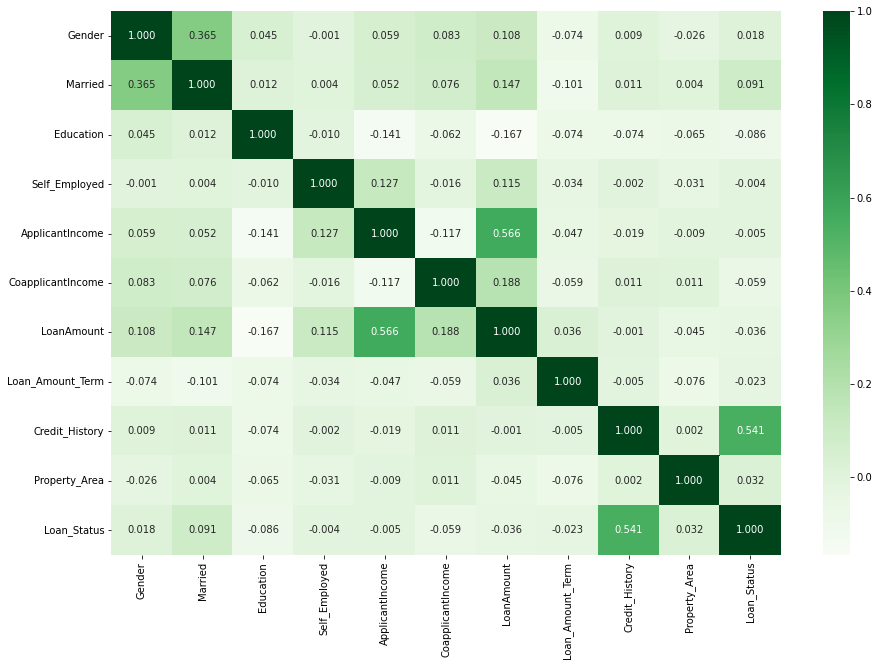

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot = True, cmap = "Greens", fmt="0.3f")

We will be using 'Gender', 'Married', 'Credit_History', 'Property_Area' as our featuresas it has higher correlation as compared to other columns

## Preparing the data for training the model

In [ ]:
features = ['Gender', 'Married', 'Credit_History', 'Property_Area']

X = train[features].values 
y = train['Loan_Status'].values 

## Preporcessing the Data

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 9. Which model are you going to choose and define the reason for going with the same model?



We will be using logistic reggression as our model as it gives a higher accuracy

## Choosing the model

## 10. Have you performed the Hyper Parameter Tuning?

Yes, hyper parameter tuning is performed

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty' : ['l2'],
        'C' : [100, 10, 1.0, 0.1, 0.01]
        }

gs = GridSearchCV(LogisticRegression(), grid, n_jobs=1, verbose=2,scoring='accuracy',return_train_score=True)

# Perform/train Grid-search
gs.fit(X_train, y_train)

print('Best Parameters :',gs.best_params_)
print('Mean Train Score :',round(gs.cv_results_['mean_train_score'].mean(),4))
print('Mean Test Score :',round(gs.cv_results_['mean_test_score'].mean(),4))
print('Best Test  Score :',round(gs.best_score_,4))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .............. C=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .............. C=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .............. C=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .............. C=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .............. C=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] .................. C=100, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. C=1.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] .................. C=1.0, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] .................. C=1.0, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] .................. C=1.0, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] .................. C=1.0, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] .................. C=1.0, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


## Training the Model

In [ ]:
model = LogisticRegression(C=100, penalty='l2', solver='newton-cg')

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting values

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1])

## 11. Compare the Actual results with the Predicted results

## Actual Values vs Predicted values

In [ ]:
pd.DataFrame({'Actual Values':y_test, 'Predicted Value':y_pred}).head()

,Actual Values,Predicted Value
0,1,1
1,1,1
2,1,0
3,1,1
4,0,1


## 12. What's the accuracy of your model?

## Displaying accuracy

In [ ]:
print(accuracy_score(y_pred,y_test))

0.8432432432432433


## 13. In order to improve the accuracy, what more approaches can be done?

1. We can add more data, treat missing data and outlier values to take better business decisions.
2. Feature Engineering can be use to explain the variance in training data thereby extract more information from existing data
3. We can select a different set of features to understand the data in a better way
4. Ensemble methods can be used to combine the result of multiple weak models and produce enhanced results
5. Adjusting hyper parameters as per the node weights can prove to be a good way to control the learning process

# Predicting values of testing dataset

In [ ]:
X_test_dataset = test[features].values

In [ ]:
X_test_dataset = sc.fit_transform(X_test_dataset)

In [ ]:
X_test_dataset_pred = model.predict(X_test_dataset)

In [ ]:
X_test_dataset_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Pickling the model

In [ ]:
file = 'model.pkl'
pkl.dump(model, open(file, 'wb'))

In [ ]:
loaded_model = pkl.load(open(file, 'rb'))
result = loaded_model.score(X_test, y_test)

In [ ]:
result

0.8432432432432433

# 14. What can you conclude with respect to the data?

The highest applicant income is 81,000 that has been earned by a male.

There are 367 loan applications included in the testing data.

308  loan applications were approved and the remaining 59 were rejected.

Thus, we sucessfully performed Data Exploration, Data Cleaning, Data Manipulation, Data Visualisation, Feature Engineering, Feature Scaling,
Feature Selection, created and tested our model